# Phân tích dữ liệu và vẽ biểu đồ điểm thi năm 2018 và 2019
### Mục đích: So sánh và phân tích điểm trung bình theo các môn học giữa các năm 2018 và 2019

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import StringIO
from datetime import datetime, timedelta
import os



# Tải dữ liệu đã làm sạch

cleaned_data_api = 'https://andyanh.id.vn/index.php/s/AQrkaif3HWgs9ke/download'

def fetch_csv_from_api(api_url):
    
    cache_file = 'cleaned_data_cache.csv'
    cache_timeout = timedelta(hours=24)
    
    if os.path.exists(cache_file):
        modified_time = datetime.fromtimestamp(os.path.getmtime(cache_file))
        if datetime.now() - modified_time < cache_timeout:
            print(f"Đang tải dữ liệu từ cache {cache_file}...")
            return pd.read_csv(cache_file)
    
    print(f"Đang tải dữ liệu từ API {api_url}...")
    response = requests.get(api_url)
    if response.status_code == 200:
        df = pd.read_csv(StringIO(response.text))
        df.to_csv(cache_file, index=False)
        return df
    else:
        raise Exception(f"Failed to fetch data: {response.status_code}")

df = pd.read_csv(cleaned_data_api.csv)


# Lọc dữ liệu theo năm

df_years = {2018: df[df["Year"] == 2018], 2019: df[df["Year"] == 2019]}


# Định nghĩa các cột điểm

score_columns = [

    "Toan",

    "Van",

    "Ly",

    "Sinh",

    "Ngoai ngu",

    "Hoa",

    "Lich su",

    "Dia ly",

    "GDCD",

]


# Tính điểm trung bình cho từng môn theo năm

mean_scores_2018 = df_years[2018][score_columns].replace(-1, float("nan")).mean()

mean_scores_2019 = df_years[2019][score_columns].replace(-1, float("nan")).mean()

mean_scores = pd.DataFrame({"2018": mean_scores_2018, "2019": mean_scores_2019})


# Hiển thị dữ liệu điểm trung bình
mean_scores

,2018,2019
Toan,4.884162,5.573748
Van,5.444146,5.442390
Ly,4.961179,5.563926
Sinh,4.561249,4.665719
Ngoai ngu,3.933543,4.240692
Hoa,4.864391,5.342898
Lich su,3.805371,4.293683
Dia ly,5.483495,5.988069
GDCD,7.157468,7.353802


### Biểu đồ 1: So sánh điểm trung bình các môn giữa năm 2018 và 2019
Biểu đồ thanh (Bar chart) so sánh điểm trung bình của từng môn giữa các năm. Điều này giúp nhận biết các môn có xu hướng tăng hoặc giảm qua từng năm.

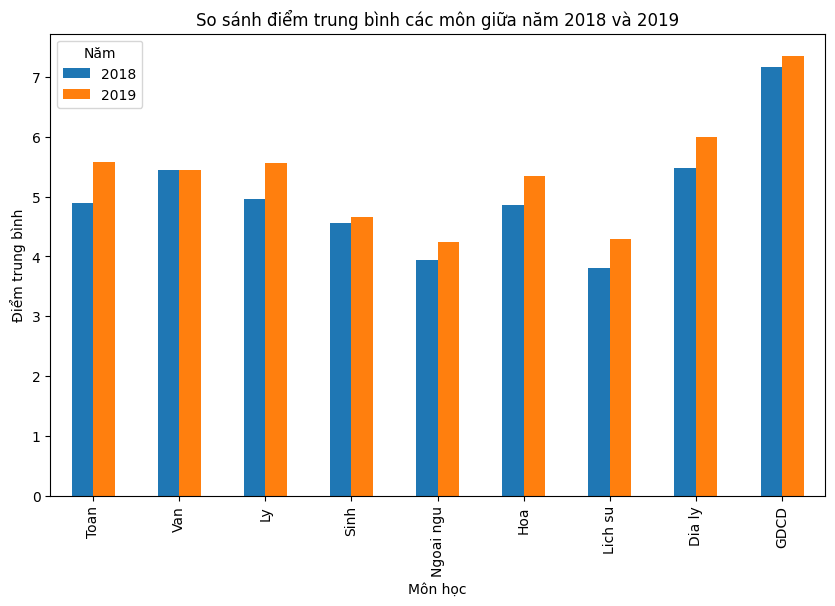

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import StringIO
from datetime import datetime, timedelta
import os



# Tải dữ liệu đã làm sạch

cleaned_data_api = 'https://andyanh.id.vn/index.php/s/AQrkaif3HWgs9ke/download'

def fetch_csv_from_api(api_url):
    
    cache_file = 'cleaned_data_cache.csv'
    cache_timeout = timedelta(hours=24)
    
    if os.path.exists(cache_file):
        modified_time = datetime.fromtimestamp(os.path.getmtime(cache_file))
        if datetime.now() - modified_time < cache_timeout:
            print(f"Đang tải dữ liệu từ cache {cache_file}...")
            return pd.read_csv(cache_file)
    
    print(f"Đang tải dữ liệu từ API {api_url}...")
    response = requests.get(api_url)
    if response.status_code == 200:
        df = pd.read_csv(StringIO(response.text))
        df.to_csv(cache_file, index=False)
        return df
    else:
        raise Exception(f"Failed to fetch data: {response.status_code}")

df = pd.read_csv(cleaned_data_api)


# Lọc dữ liệu theo năm

df_years = {2018: df[df["Year"] == 2018], 2019: df[df["Year"] == 2019]}


# Định nghĩa các cột điểm

score_columns = [
    "Toan",
    "Van",
    "Ly",
    "Sinh",
    "Ngoai ngu",
    "Hoa",
    "Lich su",
    "Dia ly",
    "GDCD",
]


# Tính điểm trung bình cho từng môn theo năm

mean_scores_2018 = df_years[2018][score_columns].replace(-1, float("nan")).mean()

mean_scores_2019 = df_years[2019][score_columns].replace(-1, float("nan")).mean()

mean_scores = pd.DataFrame({"2018": mean_scores_2018, "2019": mean_scores_2019})


# Hiển thị dữ liệu điểm trung bình
mean_scores
# Biểu đồ thanh so sánh điểm trung bình giữa 2 năm


fig, ax = plt.subplots(figsize=(10, 6))


mean_scores.plot(kind="bar", ax=ax)


ax.set_title("So sánh điểm trung bình các môn giữa năm 2018 và 2019")


ax.set_xlabel("Môn học")


ax.set_ylabel("Điểm trung bình")


ax.legend(title="Năm")


plt.show()

### Biểu đồ 2: Biểu đồ thay đổi điểm trung bình
Biểu đồ đường (Line chart) hiển thị sự thay đổi điểm trung bình của từng môn học giữa các năm. Biểu đồ này cung cấp góc nhìn về xu hướng thay đổi điểm qua thời gian.

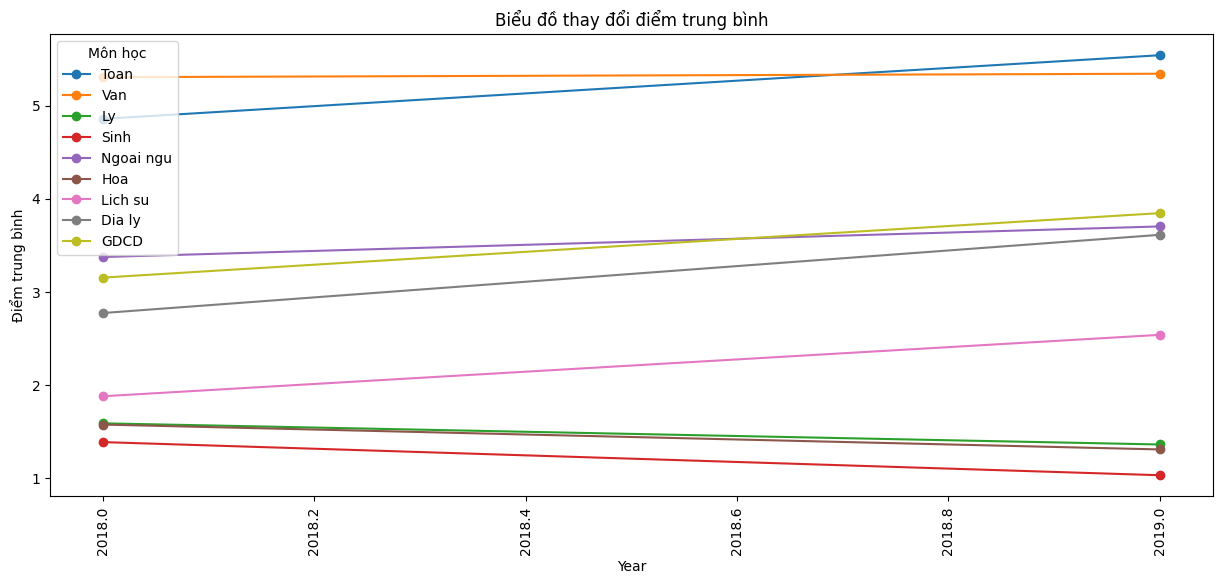

In [19]:
# Biểu đồ đường thay đổi điểm trung bình
fig, ax = plt.subplots(figsize=(15, 6))
mean_scores_by_year = df.groupby("Year")[score_columns].mean()
mean_scores_by_year.plot(kind="line", marker="o", ax=ax)
ax.set_title("Biểu đồ thay đổi điểm trung bình")
ax.set_ylabel("Điểm trung bình")
ax.legend(title="Môn học")
plt.xticks(rotation=90)
plt.show()

### Biểu đồ 3: Phân phối điểm cho từng môn năm 2018
Biểu đồ phân phối điểm cho một môn học cụ thể trong năm 2018 giúp hiểu rõ hơn về cách phân phối điểm của học sinh trong môn học đó. Ví dụ dưới đây là biểu đồ phân phối điểm môn Toán năm 2018.

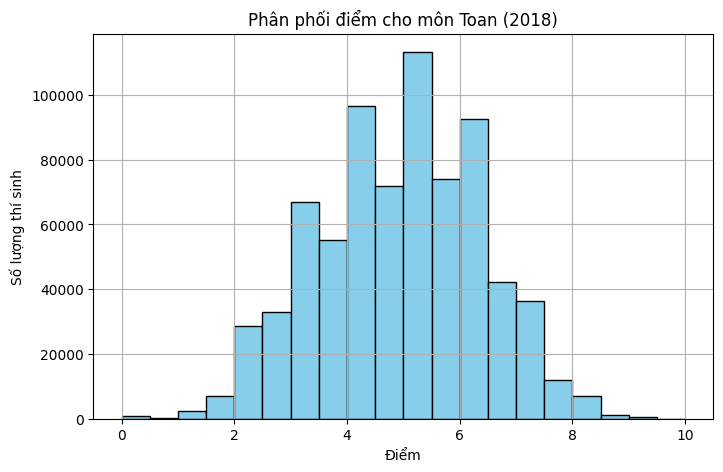

In [20]:
# Biểu đồ phân phối điểm cho môn học năm 2018
subject = "Toan"  # Bạn có thể thay đổi môn học tại đây
fig, ax = plt.subplots(figsize=(8, 5))
df_years[2018][subject].replace(-1, float("nan")).dropna().hist(
    bins=20, color="skyblue", edgecolor="black", ax=ax
)
ax.set_title(f"Phân phối điểm cho môn {subject} (2018)")
ax.set_xlabel("Điểm")
ax.set_ylabel("Số lượng thí sinh")
plt.show()

### Biểu đồ 4: Biểu đồ tròn so sánh tỉ lệ đậu rớt của năm 2018 2019
Biểu đồ tròn giúp dễ dàng quan sát tỉ lệ đậu và rớt của năm 2018 và năm 2019

<function matplotlib.pyplot.show(close=None, block=None)>

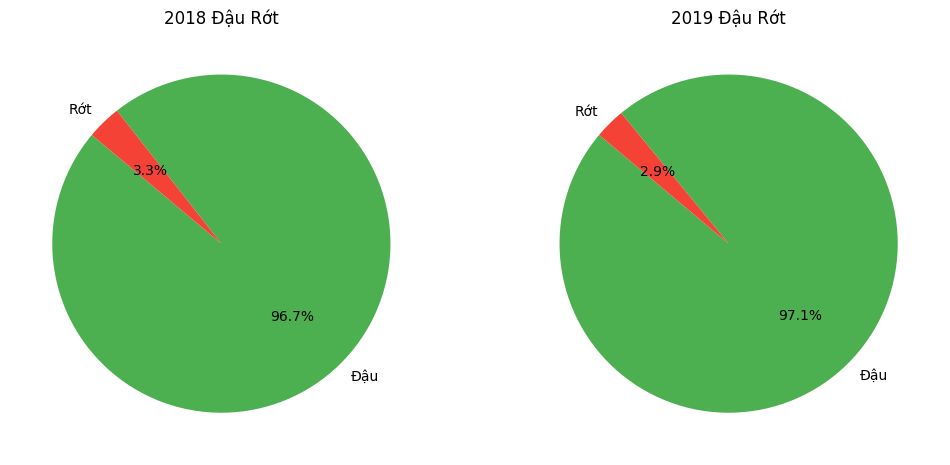

In [21]:
Summary_Result_By_Year = "Summary_Result_By_Year.csv"
df_2 = pd.read_csv(Summary_Result_By_Year)
# Labels for the pie chart
labels = ["Đậu", "Rớt"]

# df for 2018
passed_2018 = df_2["Số thí sinh đậu 2018"].sum()
failed_2018 = df_2["Số thí sinh rớt 2018"].sum()
values_2018 = [passed_2018, failed_2018]

# df for 2019
passed_2019 = df_2["Số thí sinh đậu 2019"].sum()
failed_2019 = df_2["Số thí sinh rớt 2019"].sum()
values_2019 = [passed_2019, failed_2019]

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 2018 Pie Chart
ax[0].pie(
    values_2018,
    labels=labels,
    autopct="%1.1f%%",
    startangle=140,
    colors=["#4CAF50", "#F44336"],
)
ax[0].set_title("2018 Đậu Rớt")

# 2019 Pie Chart
ax[1].pie(
    values_2019,
    labels=labels,
    autopct="%1.1f%%",
    startangle=140,
    colors=["#4CAF50", "#F44336"],
)
ax[1].set_title("2019 Đậu Rớt")
plt.show

### Biểu đồ 5: Biểu đồ khu vực học sinh các khối A, B, C, D đạt các mức điểm  năm 2018 - 2019 (dưới dạng điểm 1 -> 10).
Biểu đồ thể hiện tỉ lệ học sinh các khối A, B, C, D đạt các mức điểm khác nhau trong khoảng từ 1-10 điểm qua 2 năm 2018-2019, giúp so sánh và đánh giá kết quả học tập giữa các khối

Đang tải dữ liệu từ cache cleaned_data_cache.csv...


<Figure size 1000x600 with 0 Axes>

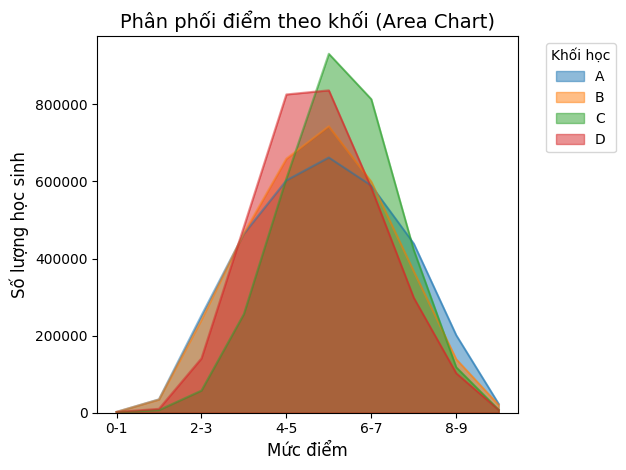

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import StringIO
import os
from datetime import datetime, timedelta

# Load dữ liệu
# API URLs
cleaned_data_api = 'https://andyanh.id.vn/index.php/s/AQrkaif3HWgs9ke/download'

def fetch_csv_from_api(api_url):
    
    cache_file = 'cleaned_data_cache.csv'
    cache_timeout = timedelta(hours=24)
    
    if os.path.exists(cache_file):
        modified_time = datetime.fromtimestamp(os.path.getmtime(cache_file))
        if datetime.now() - modified_time < cache_timeout:
            print(f"Đang tải dữ liệu từ cache {cache_file}...")
            return pd.read_csv(cache_file)
    
    print(f"Đang tải dữ liệu từ API {api_url}...")
    response = requests.get(api_url)
    if response.status_code == 200:
        df = pd.read_csv(StringIO(response.text))
        df.to_csv(cache_file, index=False)
        return df
    else:
        raise Exception(f"Failed to fetch data: {response.status_code}")

data_cleaned = fetch_csv_from_api(cleaned_data_api)

# Xác định các khối học dựa trên môn học
khối_học = {
    'A': ['Toan', 'Ly', 'Hoa'],
    'B': ['Toan', 'Hoa', 'Sinh'], 
    'C': ['Van', 'Lich su', 'Dia ly'],
    'D': ['Toan', 'Van', 'Ngoai ngu']
}

# Hàm tính điểm trung bình cho một khối
def calculate_average_score(data, subjects):
    data['Average_Score'] = data[subjects].mean(axis=1)
    valid_scores = data['Average_Score'][(data['Average_Score'] >= 0) & (data['Average_Score'] <= 10)]
    distribution = pd.cut(valid_scores, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                           right=False, labels=["0-1", "1-2", "2-3", "3-4", "4-5",
                                                "5-6", "6-7", "7-8", "8-9", "9-10"]).value_counts()
    return distribution

# Tính toán phân phối điểm theo khối
distribution_by_khoi = {}
for khoi, subjects in khối_học.items():
    distribution_by_khoi[khoi] = calculate_average_score(data_cleaned, subjects)

# Tạo DataFrame chứa kết quả
result_df = pd.DataFrame(distribution_by_khoi).fillna(0).astype(int).sort_index()

# Vẽ biểu đồ area chart
plt.figure(figsize=(10, 6))
result_df.plot(kind='area', stacked=False, alpha=0.5)

# Thêm nhãn và tiêu đề
plt.title("Phân phối điểm theo khối (Area Chart)", fontsize=14)
plt.xlabel("Mức điểm", fontsize=12)
plt.ylabel("Số lượng học sinh", fontsize=12)
plt.legend(title="Khối học", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()
